In [69]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import GridSearchCV
%config InlineBackend.figure_format = 'retina'

## Q1 Support Vector Machine

### Linear SVM

In [70]:
# 1) Load data.

X_and_Y = np.load('./arrhythmia.npy')    # Load data from file.
np.random.shuffle(X_and_Y)    # Shuffle the data.
X = X_and_Y[:,:279]   # First column to second last column: Features (numerical values) 
Y = X_and_Y[:,279]    # Last column: Labels (0 or 1)
print(X.shape, Y.shape)       # Check the shapes.
print(round(0.8*452))

(452, 279) (452,)
362


In [71]:
# 2) Split the dataset into 2 parts: 
#    (a) Training set + Validation set  (80% of all data points)
#    (b) Test set                       (20% of all data points)
X_train_val = X[:int(round(0.8*452)),:] # Get features from train + val set.
X_test      = X[:int(round(0.2*452)),:] # Get features from test set.     
Y_train_val = Y[:int(round(0.8*452))] # Get labels from train + val set.
Y_test      = Y[:int(round(0.2*452))] # Get labels from test set.  
print(X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape)

(362, 279) (90, 279) (362,) (90,)


In [72]:
# 3) Consider linear kernel. Perform grid search for best C 
#    with 3-fold cross-validation. You can use svm.SVC() for SVM
#    classifier and use GridSearchCV() to perform such grid search.
#    For more details, please refer to the sklearn documents:
#         http://scikit-learn.org/stable/modules/svm.html
#         http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

classifier = svm.SVC(kernel='linear')
C_list     = [10**-6,10**-5,10**-4,10**-3,10**-2,10**-1] # Different C to try.
clf = GridSearchCV(classifier,{'kernel':['linear'],'C':C_list})
clf.fit(X_train_val,Y_train_val)
print(clf.cv_results_['mean_test_score'])
print(clf.cv_results_['mean_train_score'])

[ 0.55801105  0.67403315  0.71270718  0.68232044  0.60220994  0.5801105 ]
[ 0.57876959  0.77212144  0.83841432  0.89227621  0.93785078  0.99308437]


/home/jytay/anaconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


/home/jytay/anaconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


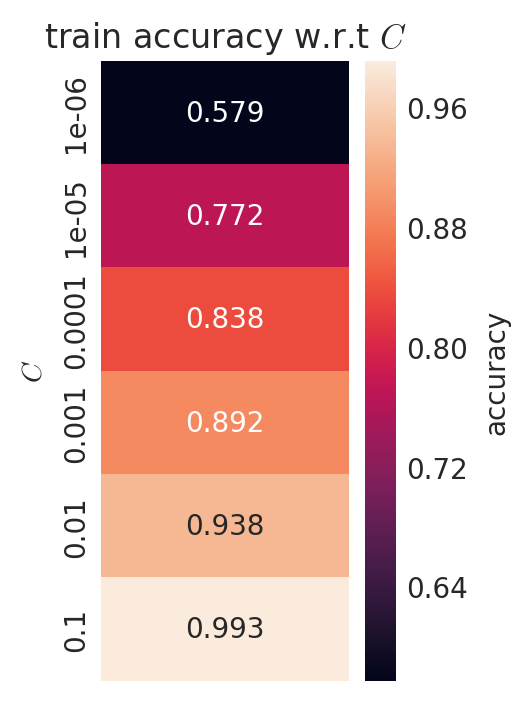

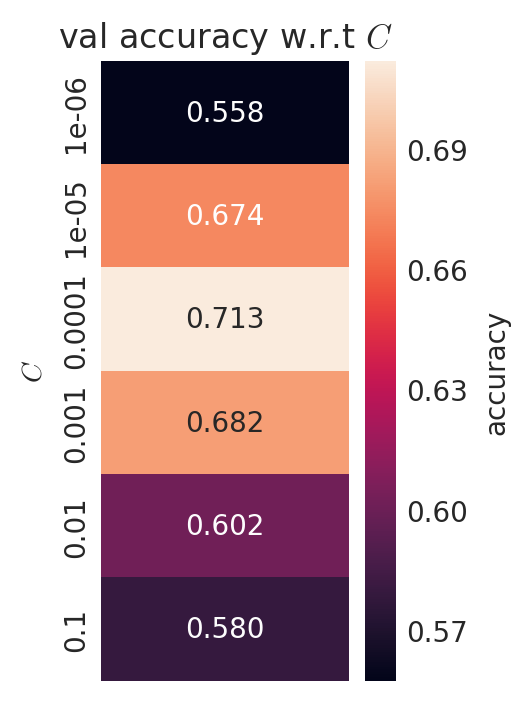

0.0001


In [73]:
# 4) Draw heatmaps for result of grid search and find 
#    best C for validation set.

def draw_heatmap_linear(acc, acc_desc, C_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=C_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$C$')
    plt.title(acc_desc + ' w.r.t $C$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()
    
#
# You can use the draw_heatmap_linear() to draw a heatmap to visualize 
# the accuracy w.r.t. C and gamma. Some demo code is given below as hint:
#
# demo_acc        = np.array([[0.8],
#                             [0.7]])
# demo_C_list     = [0.1, 1]
# draw_heatmap_linear(demo_acc, 'demo accuracy', demo_C_list)
#   
train_acc = clf.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', C_list)

val_acc = clf.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', C_list)

print(clf.best_estimator_.C)

In [74]:
# 5) Use the best C to calculate the test accuracy.
predicts = clf.predict(X_test)
correct = 0.0
for i in range(predicts.size):
    if(predicts[i] == Y_test[i]):
        correct = correct + 1

test_acc = correct/predicts.size
print(test_acc)

0.8111111111111111


### SVM with RBF Kernel

In [75]:
# 1) Consider RBF kernel. Perform grid search for best C and gamma 
#    with 3-fold cross-validation. You can use svm.SVC() for SVM
#    classifier and use GridSearchCV() to perform such grid search.
#    For more details, please refer to the sklearn documents:
#         http://scikit-learn.org/stable/modules/svm.html
#         http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV
classifier = svm.SVC(kernel='rbf')
C_list     = [0.1, 1, 10, 100] # Different C to try.
gamma_list = [10**-7, 10**-6, 10**-5, 10**-4] # Different gamma to try.
clf = GridSearchCV(classifier,{'kernel':['rbf'],'C':C_list,'gamma':gamma_list})
clf.fit(X_train_val,Y_train_val)
print(clf.cv_results_['mean_test_score'])
print(clf.cv_results_['mean_train_score'])

[ 0.53038674  0.53038674  0.63812155  0.53038674  0.53038674  0.60220994
  0.72928177  0.67955801  0.59392265  0.71546961  0.71270718  0.69060773
  0.6961326   0.71823204  0.61325967  0.69060773]
[ 0.53038876  0.53038876  0.67403953  0.53038876  0.53038876  0.67956632
  0.81767886  0.98618589  0.67127899  0.8204394   0.95580284  1.
  0.80939725  0.88813255  1.          1.        ]


/home/jytay/anaconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


/home/jytay/anaconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


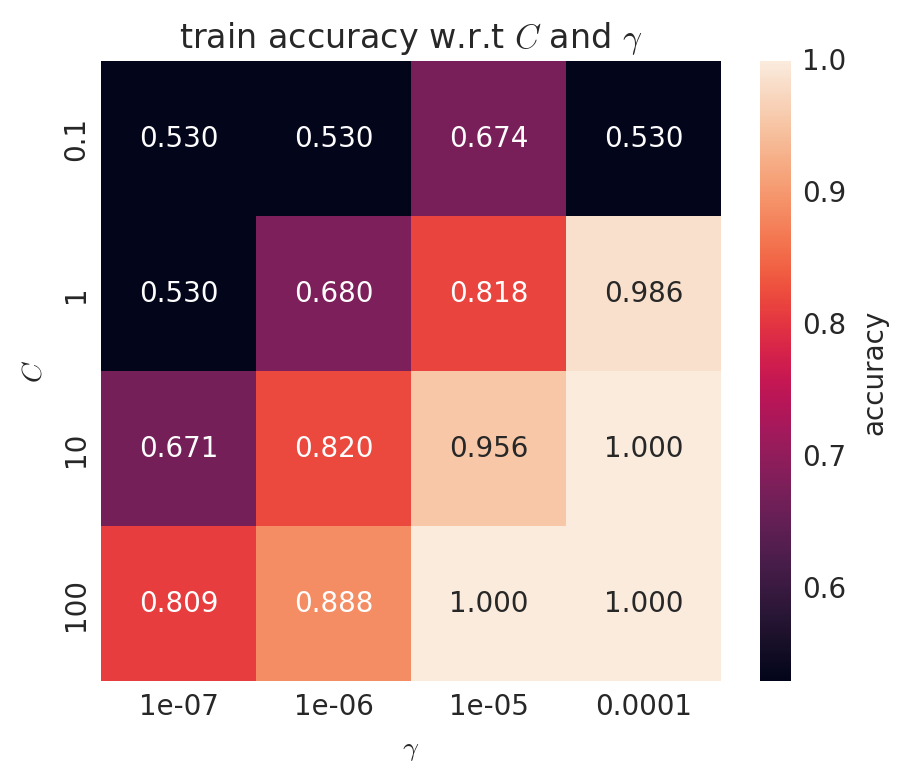

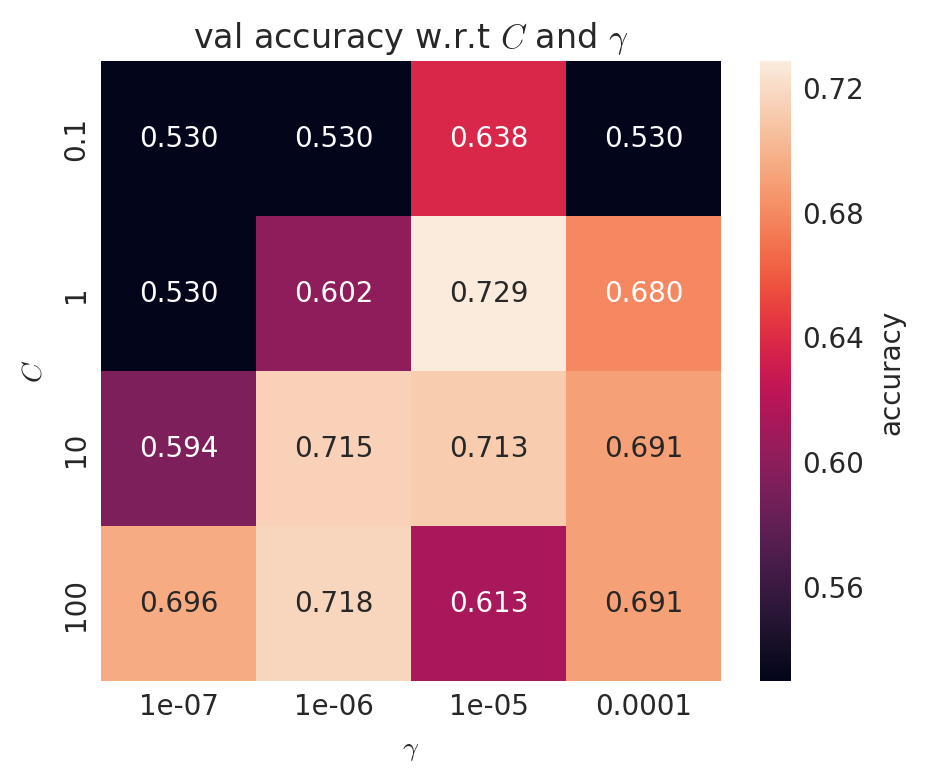

1
1e-05


In [76]:
# 2) Draw heatmaps for result of grid search and find 
#    best C and gamma for validation set.

def draw_heatmap_RBF(acc, acc_desc, gamma_list, C_list):
    plt.figure(figsize = (5,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', 
                     xticklabels=gamma_list, yticklabels=C_list)
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(xlabel = '$\gamma$', ylabel='$C$')
    plt.title(acc_desc + ' w.r.t $C$ and $\gamma$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()
    
#
# You can use the draw_heatmap_RBF() to draw a heatmap to visualize 
# the accuracy w.r.t. C and gamma. Some demo code is given below as hint:
#
# demo_acc        = np.array([[0.8, 0.7],
#                             [0.7, 0.9]])
# demo_C_list     = [0.1, 1]
# demo_gamma_list = [0.01, 0.1]
# draw_heatmap_RBF(demo_acc, 'demo accuracy', demo_gamma_list, demo_C_list)
#

train_acc = clf.cv_results_['mean_train_score'].reshape(4,4)
draw_heatmap_RBF(train_acc, 'train accuracy', gamma_list, C_list)

val_acc = clf.cv_results_['mean_test_score'].reshape(4,4)
draw_heatmap_RBF(val_acc, 'val accuracy', gamma_list, C_list)

print(clf.best_estimator_.C)
print(clf.best_estimator_.gamma)

In [77]:
# 3) Use the best C and gamma to calculate the test accuracy.
predictions = clf.predict(X_test)
correct = 0.0
for i in range(predictions.size):
    if(predictions[i] == Y_test[i]):
        correct = correct + 1

test_acc = correct/predictions.size
print(test_acc)

0.8222222222222222


### Re-implementation of Cross-validation and Grid Search 

In [78]:
# 1) Implement a simple cross-validation.
def simple_cross_validation(X_train_val, Y_train_val, C, gamma, fold):
    """
    A simple cross-validation function.
    We assume the SVM with the RBF kernel.
    
    X_train_val: Features for train and val set. 
                 Shape: (num of data points, num of features)
    Y_train_val: Labels for train and val set.
                 Shape: (num of data points,)
    C:           Parameter C for SVM.
    gamma:       Parameter gamma for SVM.
    fold:        The number of folds to do the cross-validation.
    
    Return the average accuracy on validation set.
    """
    X_all = np.array_split(X_train_val,3)
    Y_all = np.array_split(Y_train_val,3)
        
    val_acc_list = []
    train_acc_list = []
    for i in range(fold):
        X_combined = []
        Y_combined = []
        X_t = []
        Y_t = []

        if i == 0:
            X_combined = np.hstack((X_all[0].T,X_all[1].T)).T
            Y_combined = np.hstack((Y_all[0].T,Y_all[1].T)).T
            X_t = X_all[2]
            Y_t = Y_all[2]
        elif i == 1:
            X_combined = np.hstack((X_all[1].T,X_all[2].T)).T
            Y_combined = np.hstack((Y_all[1].T,Y_all[2].T)).T
            X_t = X_all[0]
            Y_t = Y_all[0]
        else:
            X_combined = np.hstack((X_all[0].T,X_all[2].T)).T
            Y_combined = np.hstack((Y_all[0].T,Y_all[2].T)).T
            X_t = X_all[1]
            Y_t = Y_all[1]
            
        classifier = svm.SVC(C=C,kernel='rbf',gamma=gamma)
        classifier.fit(X_combined,Y_combined)
        
        p = classifier.predict(X_combined)
        correct = 0.0
        for o in range(p.size):
            if(p[o] == Y_combined[o]):
                correct = correct + 1
        train_accuracy = correct/p.size
                
        p = classifier.predict(X_t)
        correct = 0.0
        for o in range(p.size):
            if(p[o] == Y_t[o]):
                correct = correct + 1
        test_accuracy = correct/p.size
                
        train_acc_list.append(train_accuracy)
        val_acc_list.append(test_accuracy)            

    return sum(val_acc_list) / len(val_acc_list), \
           sum(train_acc_list) / len(train_acc_list)

In [79]:
# 2) Implement the grid search function. 
def simple_GridSearchCV_fit(X_train_val, Y_train_val, C_list, gamma_list, fold):
    """
    A simple grid search function for C and gamma with cross-validation. 
    We assume the SVM with the RBF kernel.
    
    X_train_val: Features for train and val set. 
                 Shape: (num of data points, num of features)
    Y_train_val: Labels for train and val set.
                 Shape: (num of data points,)
    C_list:      The list of C values to try.
    gamma_list:  The list of gamma values to try.
    fold:        The number of folds to do the cross-validation.
    
    Return the val and train accuracy matrix of cross-validation. 
    All combinations of C and gamma are
    included in the matrix. Shape: (len(C_list), len(gamma_list))
    """
    val_acc_matrix   = np.zeros((4,4))
    train_acc_matrix = np.zeros((4,4))
    for c in range(len(C_list)):
        for g in range(len(gamma_list)):
            val_acc, train_acc = simple_cross_validation(X_train_val, Y_train_val, C_list[c], gamma_list[g], fold)
            val_acc_matrix[c][g] = val_acc
            train_acc_matrix[c][g] = train_acc
    return val_acc_matrix, train_acc_matrix

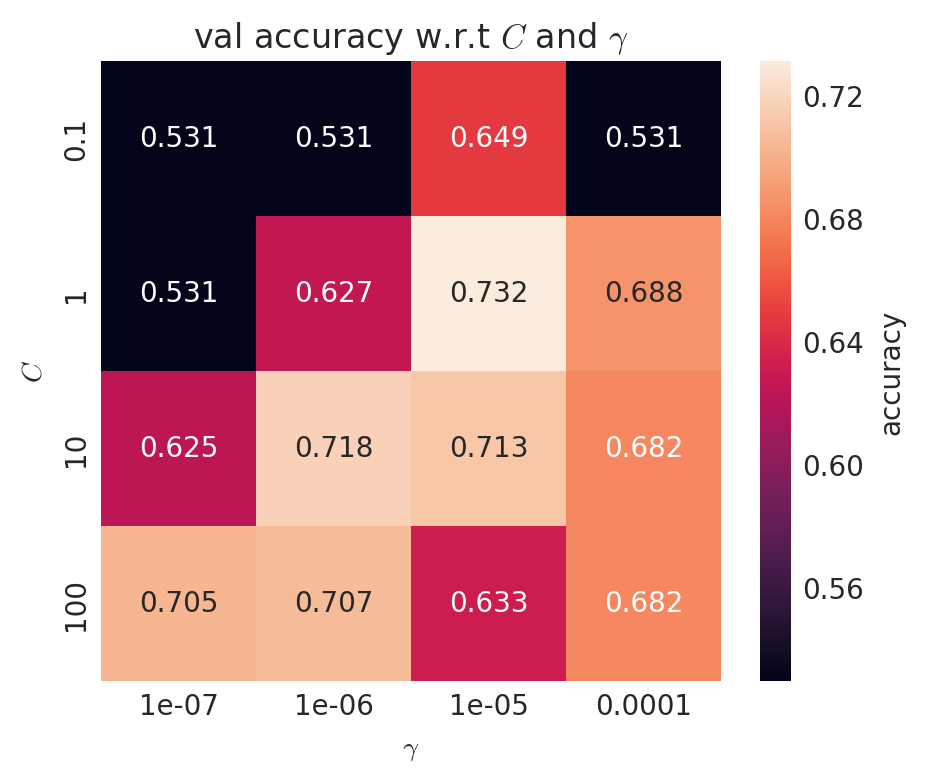

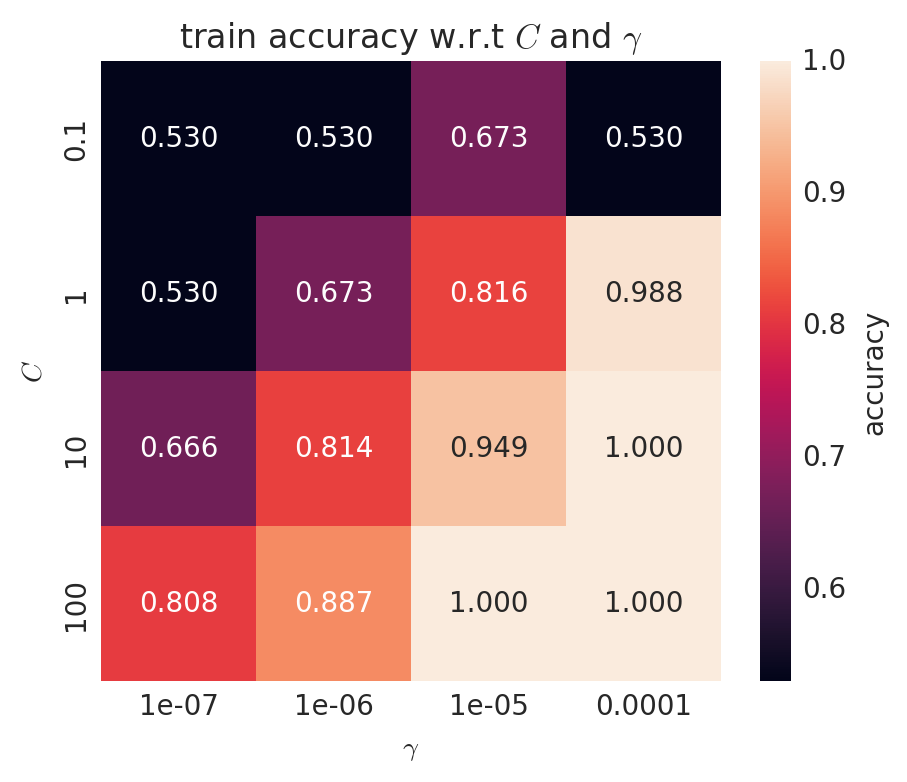

the best C to use is: 1
the best gamma to use is: 1e-05


In [80]:
# 3) Perform grid search with 3-fold cross-validation.
#    Draw heatmaps for result of grid search and find 
#    best C and gamma for validation set.
val_acc_matrix, train_acc_matrix = \
    simple_GridSearchCV_fit(X_train_val, Y_train_val, C_list, gamma_list, 3)

draw_heatmap_RBF(val_acc_matrix, 'val accuracy', gamma_list, C_list)
draw_heatmap_RBF(train_acc_matrix, 'train accuracy', gamma_list, C_list)

best_C_index, best_G_index = np.unravel_index(np.argmax(val_acc_matrix), val_acc_matrix.shape)


print("the best C to use is: " + str(C_list[best_C_index]))
print("the best gamma to use is: " + str(gamma_list[best_G_index]))